# Convolutional Neural Network

Een CNN is veel beter geschikt voor taken zoals foto herkenning en taal patronen. In tegenstelling tot een normaal NN heeft een CNN layers met nodes die niet allemaal aan elkaar verbonden zijn. 
Ook kan een CNN beter omgaan met input in 2 dimensies.
Een heel basic CNN kan de volgende structuur hebben:
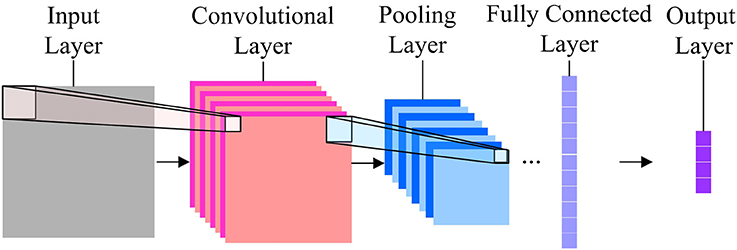

We beginnen met een input layer. Deze input layer kan bijvoorbeeld een afbeelding als input nemen. Vervolgens hebben we de Convolution Layer. Daarna hebben we een Pooling Layer. Elk van deze layers krijgt verder op in het Notebook een verdere uitleg. 

Wat opvalt is dat we een Fully Connected Layer hebben. Dit is uiteindelijk nodig voor de onze Output Layer. 

## Voordelen
* CNN heeft niet het probleem dat je heel snel kan eindigen met 150+ miljoen weights; een CNN is dus makkelijker te trainen dan een NN om deze reden
* Voor een CNN maakt het niet uit of een hond linksboven of rechtsonder staat in de foto. Een CNN focused niet op iedere pixel maar kijkt eerder naar pixels in de context van hun buren om zo een afbeelding te herkennen. 


In [268]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from scipy.signal import convolve2d

from scripts.load_data import load_train


### Convolution layer

Net als in elke andere laag ontvangt een convolutional layer een bepaalde input, het transformeert de input op een bepaalde manier en stuurt het resultaat van de transformatie door naar de volgende laag.  

Convolution lagen bestaan uit een set van leerbare filters (ook wel kernels genoemd). Iedere filter is in de ruimtelijke zin klein (qua hoogte en breedte), maar strekt zich uit over de volledige diepte van de input. De input kan hier gelezen worden als een afbeelding wat op zijn beurt weer een matrix van pixels is.  
De input kan er dus als volgt uitzien:    
![SegmentLocal](src/image_voorbeeld.png "Afbeelding voorbeeld")

Een filter is ook een matrix van pixels met een bepaalde waarde:
![SegmentLocal](src/filter_voorbeeld.png "Convolution")


Tijdens de forward propagation glijdt elke filter over de hoogte en breedte van de input en berekent de [Dot Product](https://www.mathsisfun.com/algebra/matrix-multiplying.html) tussen het filter en de input op iedere positie. 

![SegmentLocal](src/convolution_schematic.gif "Convolution")

#### How to convolve
1. Zet de filter op een deel van de input op een locatie
2. Voer de dot-product uit tussen de elementen van de input en de filter
3. Tel deze waardes bij elkaar op
4. Herhaal voor alle andere locaties

Aangezien het filter over de hoogte en de breedte van de input heen glijdt en de dot product berekend op iedere plek, zal er als output een 2-dimensionale kaart van activaties gecreëerd worden. Deze map geeft dus de reactie weer van de filter op ieder punt.  

Om te kijken wat nou het effect is van zo'n filter wordt er hieronder van jullie gevraagd om een functie te schrijven die een filter over een afbeelding 'convolved'.

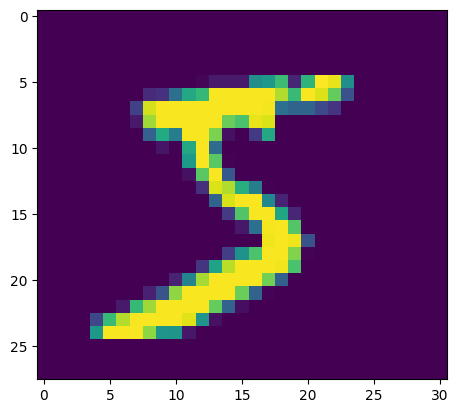

In [269]:
X_train, y_train = load_train()

# TODO selecteer een cijfer uit de training set
image_to_filter = X_train[0]
plt.imshow(image_to_filter)
plt.show()

In [270]:
def convolve(image, filt):
    """
    Task: Bouw een functie die over een foto heen glijdt en de dot product op ieder punt berekend
    en de som van daarvan terugzet in een output array.
    
    image: een 28x32 numpy array
    filt: een 3x3 array
    """
    # stap 1
    # vraag de shape op van de image en bouw alvast de output array
    # hint: de output array is 2 pixels kleiner dan de originele image in de lengte en breedte
    shape = image.shape
    clear_output = np.zeros((shape[0]-2, shape[1]-2))
    
    # stap 2
    # loop over de hoogte en breedte van de image
    # hint: we maken stappen van 1, maar met een filter van 3x3 moet je wel eerder stoppen in de range()
    for i in range(0, shape[0]-2):
        for j in range(0, shape[1]-2):
            # stap 3
            # bereken de dot product tussen de filter en de regio van de image
            # hint: maak gebruik van slices en numpy functies
            clear_output[i][j] = np.sum(filt * image[i:i+3, j:j+3])
    
    # stap 3
    # bereken voor iedere regio de dot product tussen de regio en de filter en schrijf de som hiervan naar de output array
    # hint: maak gebruik van slices en numpy functies
    
    # stap 4
    # return de output array
    return clear_output

Gebruikmakend van de bovenstaande functie zullen we nu het verschil laten zien tussen de input en de activatie kaart die uiteindelijk eruit komt.

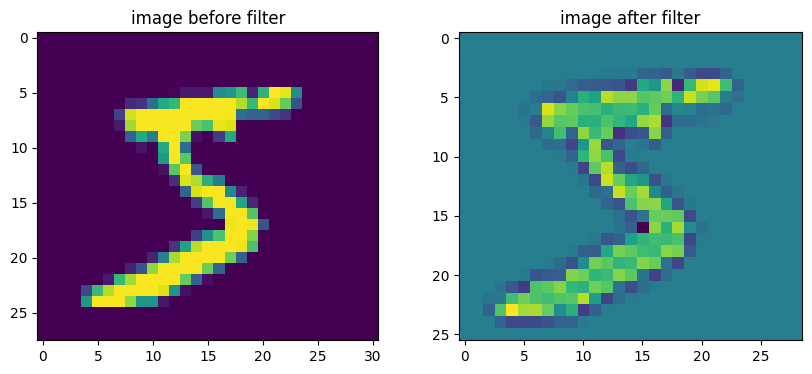

In [271]:
# the filter to be used for convolution
u_filter = [[0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]]

# print image and the output after convolution
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(image_to_filter)
axs[0].set_title("image before filter")

conv = convolve(image_to_filter, u_filter)

#TODO zet de met behulp van de eerder geschreven functie de afbeelding om tot de activatie map
axs[1].imshow(conv)
axs[1].set_title("image after filter")

plt.show()

Er bestaan redelijk veel filters die uiteindelijk allemaal een bepaald resultaat hebben. Hieronder laten we de [Sobel filters](https://en.wikipedia.org/wiki/Sobel_operator) zien en een filter die diagonale lijnen 'herkent'. De Sobel filters worden gebruikt om rechte lijnen te 'herkennen'

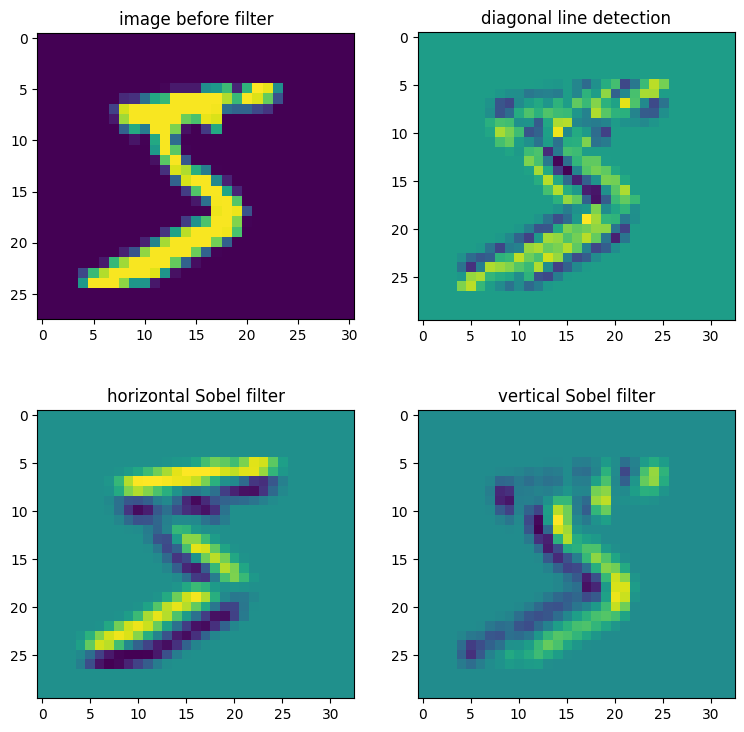

In [272]:
diagonal_filter = [[-1, -1, 2], 
           [-1, 2, -1],
           [2, -1, -1]]

gx_sobel = [[-1, 0, 1], 
           [-2, 0, 2],
           [-1, 0, 1]]

gy_sobel = [[1, 2, 1], 
           [0, 0, 0],
           [-1, -2, -1]]

# plot the filters
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

axs[0][0].imshow(image_to_filter)
axs[0][0].set_title("image before filter")

# identity filter
axs[0][1].imshow(convolve2d(image_to_filter, diagonal_filter))
axs[0][1].set_title("diagonal line detection")

# Gx sobel filter
axs[1][0].imshow(convolve2d(image_to_filter, gy_sobel))
axs[1][0].set_title("horizontal Sobel filter")

# Gy sobel filter
axs[1][1].imshow(convolve2d(image_to_filter, gx_sobel))
axs[1][1].set_title("vertical Sobel filter")

plt.show()

Het netwerk leert uiteindelijk dus filters die activeren wanneer ze een bepaalde visuele feature ‘zien’ zoals een edge of een corner of bijvoorbeeld een bepaalde kleurencombinatie. Dit komt door het feit dat pixels gerelateerd zijn aan pixels die vlak bij hun liggen. Door convolutie kunnen de relaties tussen verschillende delen van de afbeelding gepreserveerd worden. 

Door het gebruik van meerdere filters kunnen meerdere features uit een afbeelding gehaald worden. Aan het begin van het netwerk zouden het kleine dingen zijn zoals, rechte lijnen en schuine lijnen, maar later in het netwerk, op latere convolution layers zal het netwerk dan combinaties van dit soort features aan kunnen leren.  

![SegmentLocal](src/visual-layer1.png "Multiple Conv layers")

Samenvattend, een netwerk heeft dus een set van filters per convolution layer en iedere filter zal zijn eigen 2-dimensionale kaart van activaties creëren (ook wel een 'Feature Map' genoemd). De volume/diepte van de layer zal uiteindelijk alle gestapelde activatie kaarten zijn. Een convolution laag wordt dus voornamelijk gebruikt om bepaalde features uit een afbeelding te halen.

![SegmentLocal](src/convolution_operation.gif "Convolution")

In de praktijk leert een CNN de waardes van de filters zichzelf aan tijdens het trainen. Desalniettemin moeten we wel aan het begin een aantal parameters meegeven. Wat betreft parameters kunnen de volgende instellingen gekozen worden.  

#### Hyperparameters:

- **Filter size**  
Hoe groot de filters op de laag zijn ($n \times n$).  

- **Depth**  
Refereert naar de hoeveelheid filters die gebruikt worden in de conv layer. Des te meer filters, des te meer features uit de afbeeldingen gehaald kunnen worden en hoe beter het netwerk wordt in het herkennen van patronen in nieuwe afbeeldingen.

- **Stride**  
De Stride bepaalt met hoeveel stappen/pixels het filter over de input heen schuift. Met een Stride van 1 zal de filter met 1 pixel per keer over de input heen schuiven. Een hogere Stride zal de dimensionaliteit van de output verkleinen.

- **Padding**    
Padding wordt gebruikt om de dimensionaliteit van de output te regelen. Met *valid-padding* wordt de input dimensionaliteit niet behouden, terwijl *zero-padding* ervoor zorgt dat deze dimensionaliteit wel behouden wordt. Bij *zero-padding* wordt er namelijk een rij met elementen van de waarde 0 om de input matrix heengelegt.  



In [273]:
def print_matrix(matrix):
    """"""
    for x in matrix:
        print(" ".join(map(str, x)))

matrix = [[3, 5, 6], [6, 2, 8], [9, 5, 6]]

print("Matrix before padding:")
print_matrix(matrix)
print("\nMatrix after zero padding:")
print_matrix(np.pad(matrix, 1))


Matrix before padding:
3 5 6
6 2 8
9 5 6

Matrix after zero padding:
0 0 0 0 0
0 3 5 6 0
0 6 2 8 0
0 9 5 6 0
0 0 0 0 0


### ReLu layer

Een eventuele extra berekening kan uitgevoerd worden na iedere Convolution operation. 
De ReLu (Rectified Linear Unit) laag past per element de activatie functie $max(0,x)$ toe.  

De ReLu laag wordt voornamelijk gebruikt om de [non-lineariteit](https://www.investopedia.com/terms/n/nonlinearity.asp) in de afbeeldingen te verhogen. In afbeeldingen bevinden zich een hoge hoeveelheid non-lineaire features zoals de transitie tussen pixels, kleuren en grenzen. De ReLu functie breekt de eventuele lineariteit die kan ontstaan bij de convolutie operatie af.  

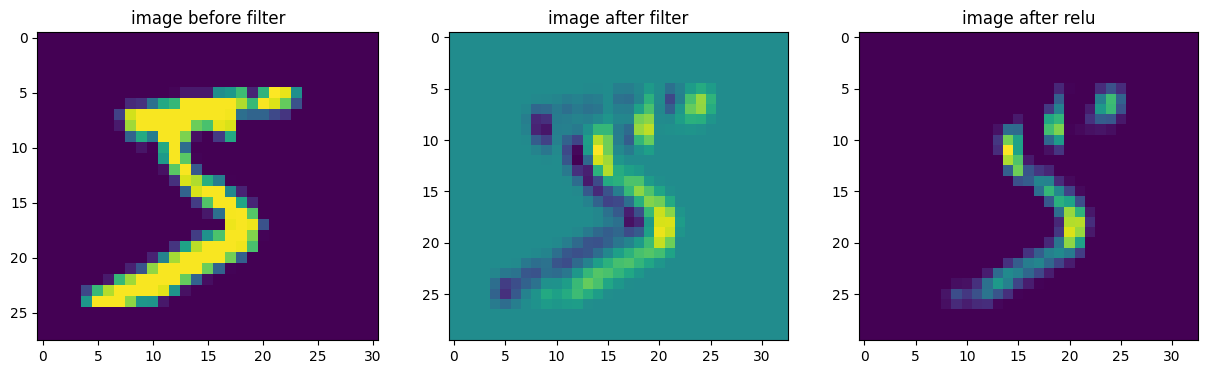

In [274]:
#ReLu function
def relu(X):
    # TODO schrijf de ReLu functie
    return np.maximum(X, 0)
    

# plot the filters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].imshow(image_to_filter)
axs[0].set_title("image before filter")

filtered_img = convolve2d(image_to_filter, gx_sobel)

axs[1].imshow(filtered_img)
axs[1].set_title("image after filter")

axs[2].imshow(relu(filtered_img))
axs[2].set_title("image after relu")

plt.show()

De ReLu functie heeft in de bovenstaande voorbeeld alle negatieve waarden weggehaald. Hierdoor is het verschil tussen de afbeelding voor en na ReLu activatie dat na de activatie de waardes veel abrupter veranderen (qua kleur). De lineaire verandering is vrijwel weggehaald.

### Pooling layer

Pooling layers worden over het algemeen toegevoegd na convolution layers. De functie van een pooling layer is om de dimensionaliteit te verkleinen (downsampling). Dit wordt gedaan door de hoeveelheid pixels uit de output van de vorige convolution layer te verminderen. Tegelijkertijd zorgt het ervoor dat alle belangrijke informatie behouden blijft.  

Doordat pooling voor een reductie in de dimensionaliseit zorgt zullen tegelijkertijd ook de hoeveelheid parameters die getweakt moeten worden afnemen waardoor het netwerk computatief minder belastend zal zijn.

![SegmentLocal](src/pool-size.svg "Convolution")


#### Hoe werkt (max) pooling?

Allereerst wordt een $n \times n$ regio gedefinieerd (een pool size) als filter voor de max pooling operatie. Hierna wordt er een bepaalde ‘stride’ gekozen (Hoe snel beweegt de filter over de afbeelding).  

Uiteindelijk schuift de filter over de output van de convolutional layer en berekent het per regio de maximale waarde, die uiteindelijk dan ook opgeslagen wordt. Alle maximale waarden worden op deze manier berekend en opgeslagen zodat uiteindelijk als output van de pooling layer deze waardes worden meegegeven.  

Uiteindelijk wordt er dus per regio (een 'pool' van nummers) de maximale (max) waarde meegenomen.


![SegmentLocal](src/pooling-layer.png "Max pooling")

Om te kijken wat het effect nou is van max pooling wordt er hieronder gevraagd om een functie te schrijven die max pooling toepast.

In [275]:
def max_pooling(image, n):
    """
    Task: Bouw een functie die over een afbeelding heen glijdt en per regio van n breed en n hoog
    het maximale element eruit haalt en deze in een output array zet.
    
    image: een 28x32 numpy array
    n: de grootte van de pool size
    """
    
    # stap 1
    # vraag de shape op van de image en bouw alvast de output array
    # hint: check hoe vaak de 'pool size' erin past
    


    # stap 2
    # loop over de hoogte en breedte van de output
    # hint: Wanneer we over de output itereren zal een index out of bounds kunnen voorkomen

    
    # stap 3
    # selecteer de regio waar de filter in moet zoeken naar het maximale element
    # gebruik slices en een np functie
    
    
    # stap 4
    # return de output array
     
    output =  np.zeros((image.shape[0]//n, image.shape[1]//n))
    for y in range(1, image.shape[1]-1, n):
        for x in range(1, image.shape[0]-1, n):
            region = image[x-(n//2):x+((n//2)+1), y-(n//2):y+((n//2)+1)]
            output[(x-1)//n, (y-1)//n] = region.max()

    return output


Nadat we de functie voor max pooling geschreven hebben gaan we hem uitvoeren om te zien hoe hij nou uiteindelijk eruitziet.

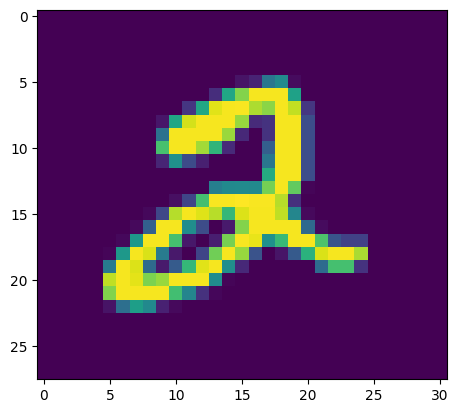

In [276]:
# TODO selecteer een cijfer uit de training set
image_to_pool = X_train[5]
plt.imshow(image_to_pool)
plt.show()


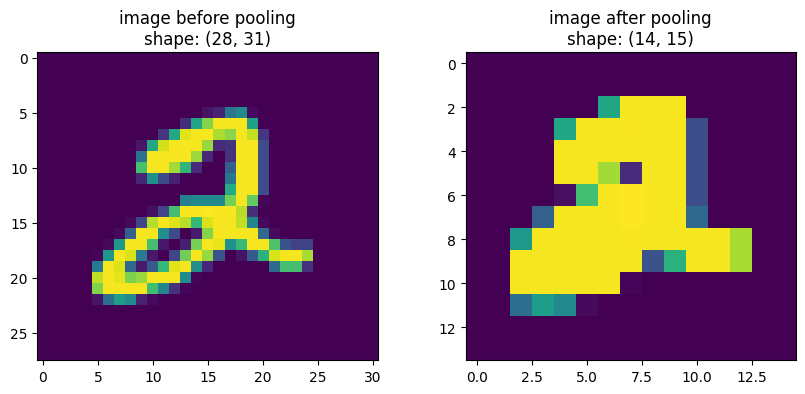

In [277]:
# TODO voer de pooling functie uit over de afbeelding met een n = 2
image_after_pool = max_pooling(image_to_pool, 2)

# print image and the output after convolution
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(image_to_pool)
axs[0].set_title(
    "image before pooling\nshape: {0}".format(image_to_pool.shape))

axs[1].imshow(image_after_pool)
axs[1].set_title("image after pooling\nshape: {0}".format(
    image_after_pool.shape))

plt.show()


#### Waarom max pooling?

Naast max pooling bestaan er ook min, average en sum pooling. Echter wordt over het algemeen max pooling het meest toegepast.   

Max pooling kan eventuele overfitting voorkomen. De denkwijze hierachter is dat het netwerk voor een afbeelding bepaalde features eruit wilt halen. In de output van de convolutional layer kunnen de pixels met een hogere waarde gezien worden als het meest geactiveerd. Met max pooling wordt hierbij dus per regio de meest geactiveerde pixel eruit gehaald terwijl de minder geactiveerde pixels achtergelaten worden. Hierdoor worden dus uiteindelijk de hogere waardes gepreserveerd. Hierbij werkt de max pooling filter dus als een Noise Suppressant.  
  
Samenvattend,  
Pooling zorgt ervoor dat de dimensionaliteit van de resolutie kleiner wordt wat op zijn beurt tot een reductie van de benodigde rekenkracht leidt. Ook kan door middel van pooling eventuele overfitting voorkomen worden.

### Softmax functie
Om uiteindelijk een totaal plaatje te krijgen van een CNN 
moet het programma ook voorspellingen kunnen maken aan de 
hand van kansen. Dit wordt gedaan door de laatste layer genaamd 
de soft max. Dit is een dense layer (volledig verbonden) wat gebruik 
maakt van de Softmax functie, ook wel activatie functie genoemd zoals 
je die misschien wel kent als Sigmoid, Tanh of ReLu.


Absolute waarden worden omgezet naar relatieve waarden (ten opzichte van elkaar, zodat de som van de waarden 1 is)

Wanneer er een CNN wordt gebouwd kan er als parameter voor 'Activation' een Softmax functie gekozen worden. Wij zullen echter de achtergrond van deze functie wat meer benadrukken zodat je ook precies weet wat er eigenlijk gebeurt. Stap voor stap zal worden verteld hoe de functie in elkaar zit zodat je het zelf kunt schrijven

### De wiskundige notatie voor de Softmax functie:
$${Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j\exp(x_j)}$$

Hoewel de wiskundige notatie er wat 'lastig' uit kan zien, is dit makkelijk te herschrijven in een Python functie. 

### Dog or cat?

In [278]:
![SegmentLocal](src/dog_or_cat.png "Softmax")

'[SegmentLocal]' is not recognized as an internal or external command,
operable program or batch file.


### Stap 1
- In het voorbeeld hierboven wordt er gekeken of het input gegeven een 'Dog' of 'Cat' is. We zullen hiervoor naar de laatste rode omcirkelde nodes moeten gaan kijken. Deze houden namelijk een waarde vast die door onze Softmax functie heen gaat. *(note: in de foto zie je al dat er een uitkomst is van z1 = 95% en z2 = 5%)*

- Aangezien er geen waarden zijn meegegeven in de foto zullen we zelf even ter illustratie getallen meegeven:
    - [[3,1]] --> dog=3, cat=1

- Deze waarden gaan elk tot de macht het grondgetal e: 'Numerator'
    - $e^3$
    - $e^1$

### Stap 2 

- Door vervolgens alle uitkomsten bij elkaar op te tellen krijg je de 'Denominator'
    - $e^3$ = 20.088
    - $e^1$ = 2.7182
    - 20.088 + 2.718282 = 22.7

### Stap 3

- De kans wordt berekend door: 
    - Numerator / Denominator 
    - ($e^3$ / 22.7) = 0.884..
    - ($e^1$ / 22.7) = 0.119..

### Wat betekenen deze uitkomsten?
- 'Dog' krijgt een probability van 0.884 wat 88% is
- 'Cat' krijgt een veel lagere probability van 0.119, dus 12% 
- Het model kan dus met 88% zekerheid zeggen dat het gegeven input een foto is van een hond. Maar ook met 12% zekerheid zeggen dat het een kat is. 

#### BELANGRIJK: *Voor de kansberekening geldt dat deze waarden samen uitkomen op 100%*

Tip: In python kan je werken met het $e$-getal door middel van math.exp


In [279]:
"""Geef een lijst op met willekeurige output nodes, dit kunnen er 2 zijn, maar ook 4.."""
"""Specify a list of random output nodes, it can be 2 or 4.."""
nodes = [0, 1, 2, 3]

In [280]:
def softmax_functie(nodes):
    """
    Dit wordt de Softmax functie zoals je hebt gelezen in de voorgaande stappen:
    - bereken de numerator
    - bereken de denominator
    - return hiermee uiteindelijk de 'kans' functie
    """
    return np.exp(nodes)/np.sum(np.exp(nodes))


In [281]:
"""Plot functie"""
def plot_me(nodes):
    plt.title("Output of nodes")
    for i, j in enumerate(nodes):
        plt.bar(i,j)
    plt.show()

 ### Output nodes van de hidden layer waarvan de softmax functie nog niet is toegepast
 Zoals je ziet kun je al in een oogopslag zien welke uitkomst het grootst is. Het nut van de Softmax functie zit hem dan ook meer in de waarschijnlijkheid wat meer toegevoegde waarde heeft. 

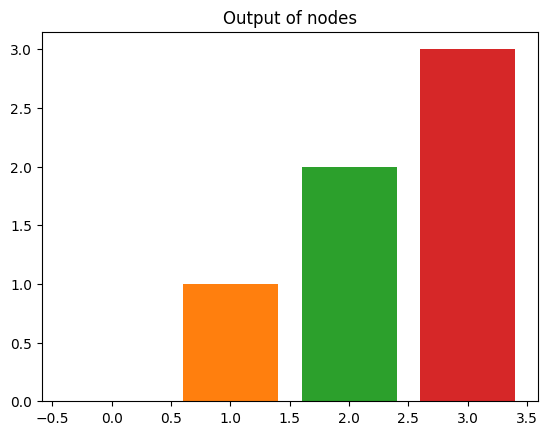

In [282]:
plot_me(nodes)

### Haal nu die output nodes eerst door de Softmax functie heen om het vervolgens weer te plotten

In [283]:
softmax_nodes = softmax_functie(nodes)
print("Output nodes after applying the Softmax function: {}".format(softmax_nodes))

total_softmax_nodes = sum(softmax_nodes)
print("Sum of the probabilities: {}".format(total_softmax_nodes))

Output nodes after applying the Softmax function: [0.0320586  0.08714432 0.23688282 0.64391426]
Sum of the probabilities: 1.0


### Grafiek na het gebruiken van de Softmax functie
Wat de Softmax functie, zoals je ziet doet is het vergroten van de verschillen door te normalizeren. 

            "Push one result closer to 1 while another closer to 0"

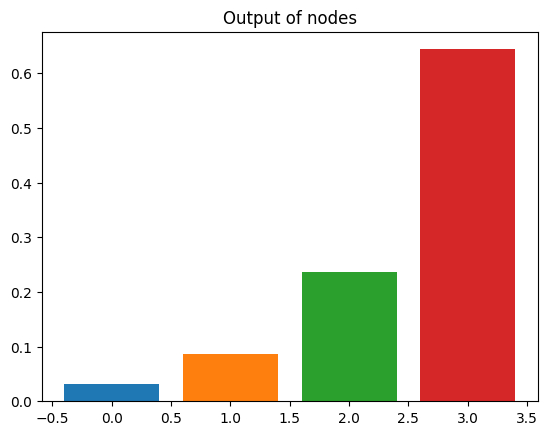

In [284]:
plot_me(softmax_nodes)

#### Zoals je ziet is het heel makkelijk om handmatig de Softmax functie te schrijven en gebruiken. We hebben de output van elke node namelijk geherdefinieerd en uitkomsten gegeven van 0 tot 1. 

### Sources

- Aldewereld, H. & van der Bijl, B. & Bunk, J. (2017, oktober). Applied Artificial Intelligence. Geraadpleegd op 7 februari 2020, van https://canvas.hu.nl/courses/7569/files/694738/download?wrap=1

- Zhou, V. (2019, 22 mei). CNNs, Part 1: An Introduction to Convolutional Neural Networks. Geraadpleegd op 9 maart 2020, van https://victorzhou.com/blog/intro-to-cnns-part-1/

- Gazi Yalcin, O. (2018, 19 augustus). Image Classification in 10 Minutes with MNIST Dataset. Geraadpleegd op 12 maart 2020, van https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

- ujjwalkarn. (2016, 11 augustus). An intuitive explanation of convolutional neural networks. Geraadpleegd op 13 maart 2020, van https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

- SuperDataScience (2018, 17 augustus). Convolutional Neural Networks (CNN): Step 1(b) - ReLU Layer. Geraadpleegd op 14 maart 2020, van https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-1b-relu-layer/

- Deshpande, A. (2019), A Beginner's Guide To Understanding Convolutional Neural Networks Part 2, van https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

- Zhou, V. (2019, 22 juli), A Simple Explanation of the Softmax Function, van https://victorzhou.com/blog/softmax/ 

- Data Science (2018, 20 januari), Understand the Softmax Function in Minutes, van https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d 